# Task 7 : Hotel Booking Cancellation Analysis

A hotel chain wants to identify signs that can help foretell if guests are going to cancel their room bookings. By doing so, they can better anticipate the occurrence of such events and adjust their room prices and cancellation policies accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Importation

Importion of the data and checking that everything is okay (no missing values, no strange data types, ...)

In [2]:
df = pd.read_csv('bookings.txt', delimiter=',')
df.head()

,hotel,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,canceled
0,City Hotel,February,9,21,1,0,2,BB,ESP,Online TA,TA/TO,A,A,0,No Deposit,Transient,91.0,0,1,1
1,City Hotel,July,29,17,1,0,2,SC,SWE,Online TA,TA/TO,A,A,0,No Deposit,Transient,140.0,0,2,1
2,City Hotel,July,29,22,1,1,2,HB,DEU,Offline TA/TO,TA/TO,A,A,0,No Deposit,Transient-Party,122.4,0,1,0
3,City Hotel,March,11,9,0,3,2,BB,USA,Online TA,TA/TO,B,B,0,No Deposit,Transient,77.5,0,2,1
4,City Hotel,September,38,11,1,0,2,SC,GBR,Online TA,TA/TO,A,A,0,No Deposit,Transient,89.0,0,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   arrival_date_month           5000 non-null   object 
 2   arrival_date_week_number     5000 non-null   int64  
 3   arrival_date_day_of_month    5000 non-null   int64  
 4   stays_in_weekend_nights      5000 non-null   int64  
 5   stays_in_week_nights         5000 non-null   int64  
 6   adults                       5000 non-null   int64  
 7   meal                         5000 non-null   object 
 8   country                      5000 non-null   object 
 9   market_segment               5000 non-null   object 
 10  distribution_channel         5000 non-null   object 
 11  reserved_room_type           5000 non-null   object 
 12  assigned_room_type           5000 non-null   object 
 13  booking_changes   

Some numerical variables may need to be transformed in object type to not have a biased ordinal interpretation of its values. 

### Proportion of cancellation in the dataset

In [4]:
propoortion_of_cancellations = df['canceled'].value_counts()[1]/(df['canceled'].value_counts()[0]+df['canceled'].value_counts()[1])
propoortion_of_cancellations

0.3652

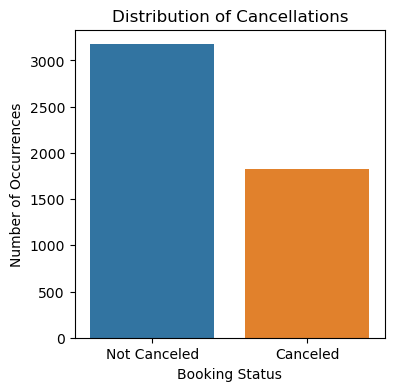

In [5]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='canceled')

# Ajustement des labels de l'axe x
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])

# Modification des titres et étiquettes en anglais
plt.title('Distribution of Cancellations')
plt.xlabel('Booking Status')
plt.ylabel('Number of Occurrences')
plt.show()

More than one third of cancellations is a lot, and it justifies this study as a complex problem to solve for the hotel company.

### Distributions of the variables in the dataset

In [6]:
df['booking_changes'].value_counts()

booking_changes
0     4265
1      506
2      168
3       30
4       15
5        9
6        3
7        2
18       1
8        1
Name: count, dtype: int64

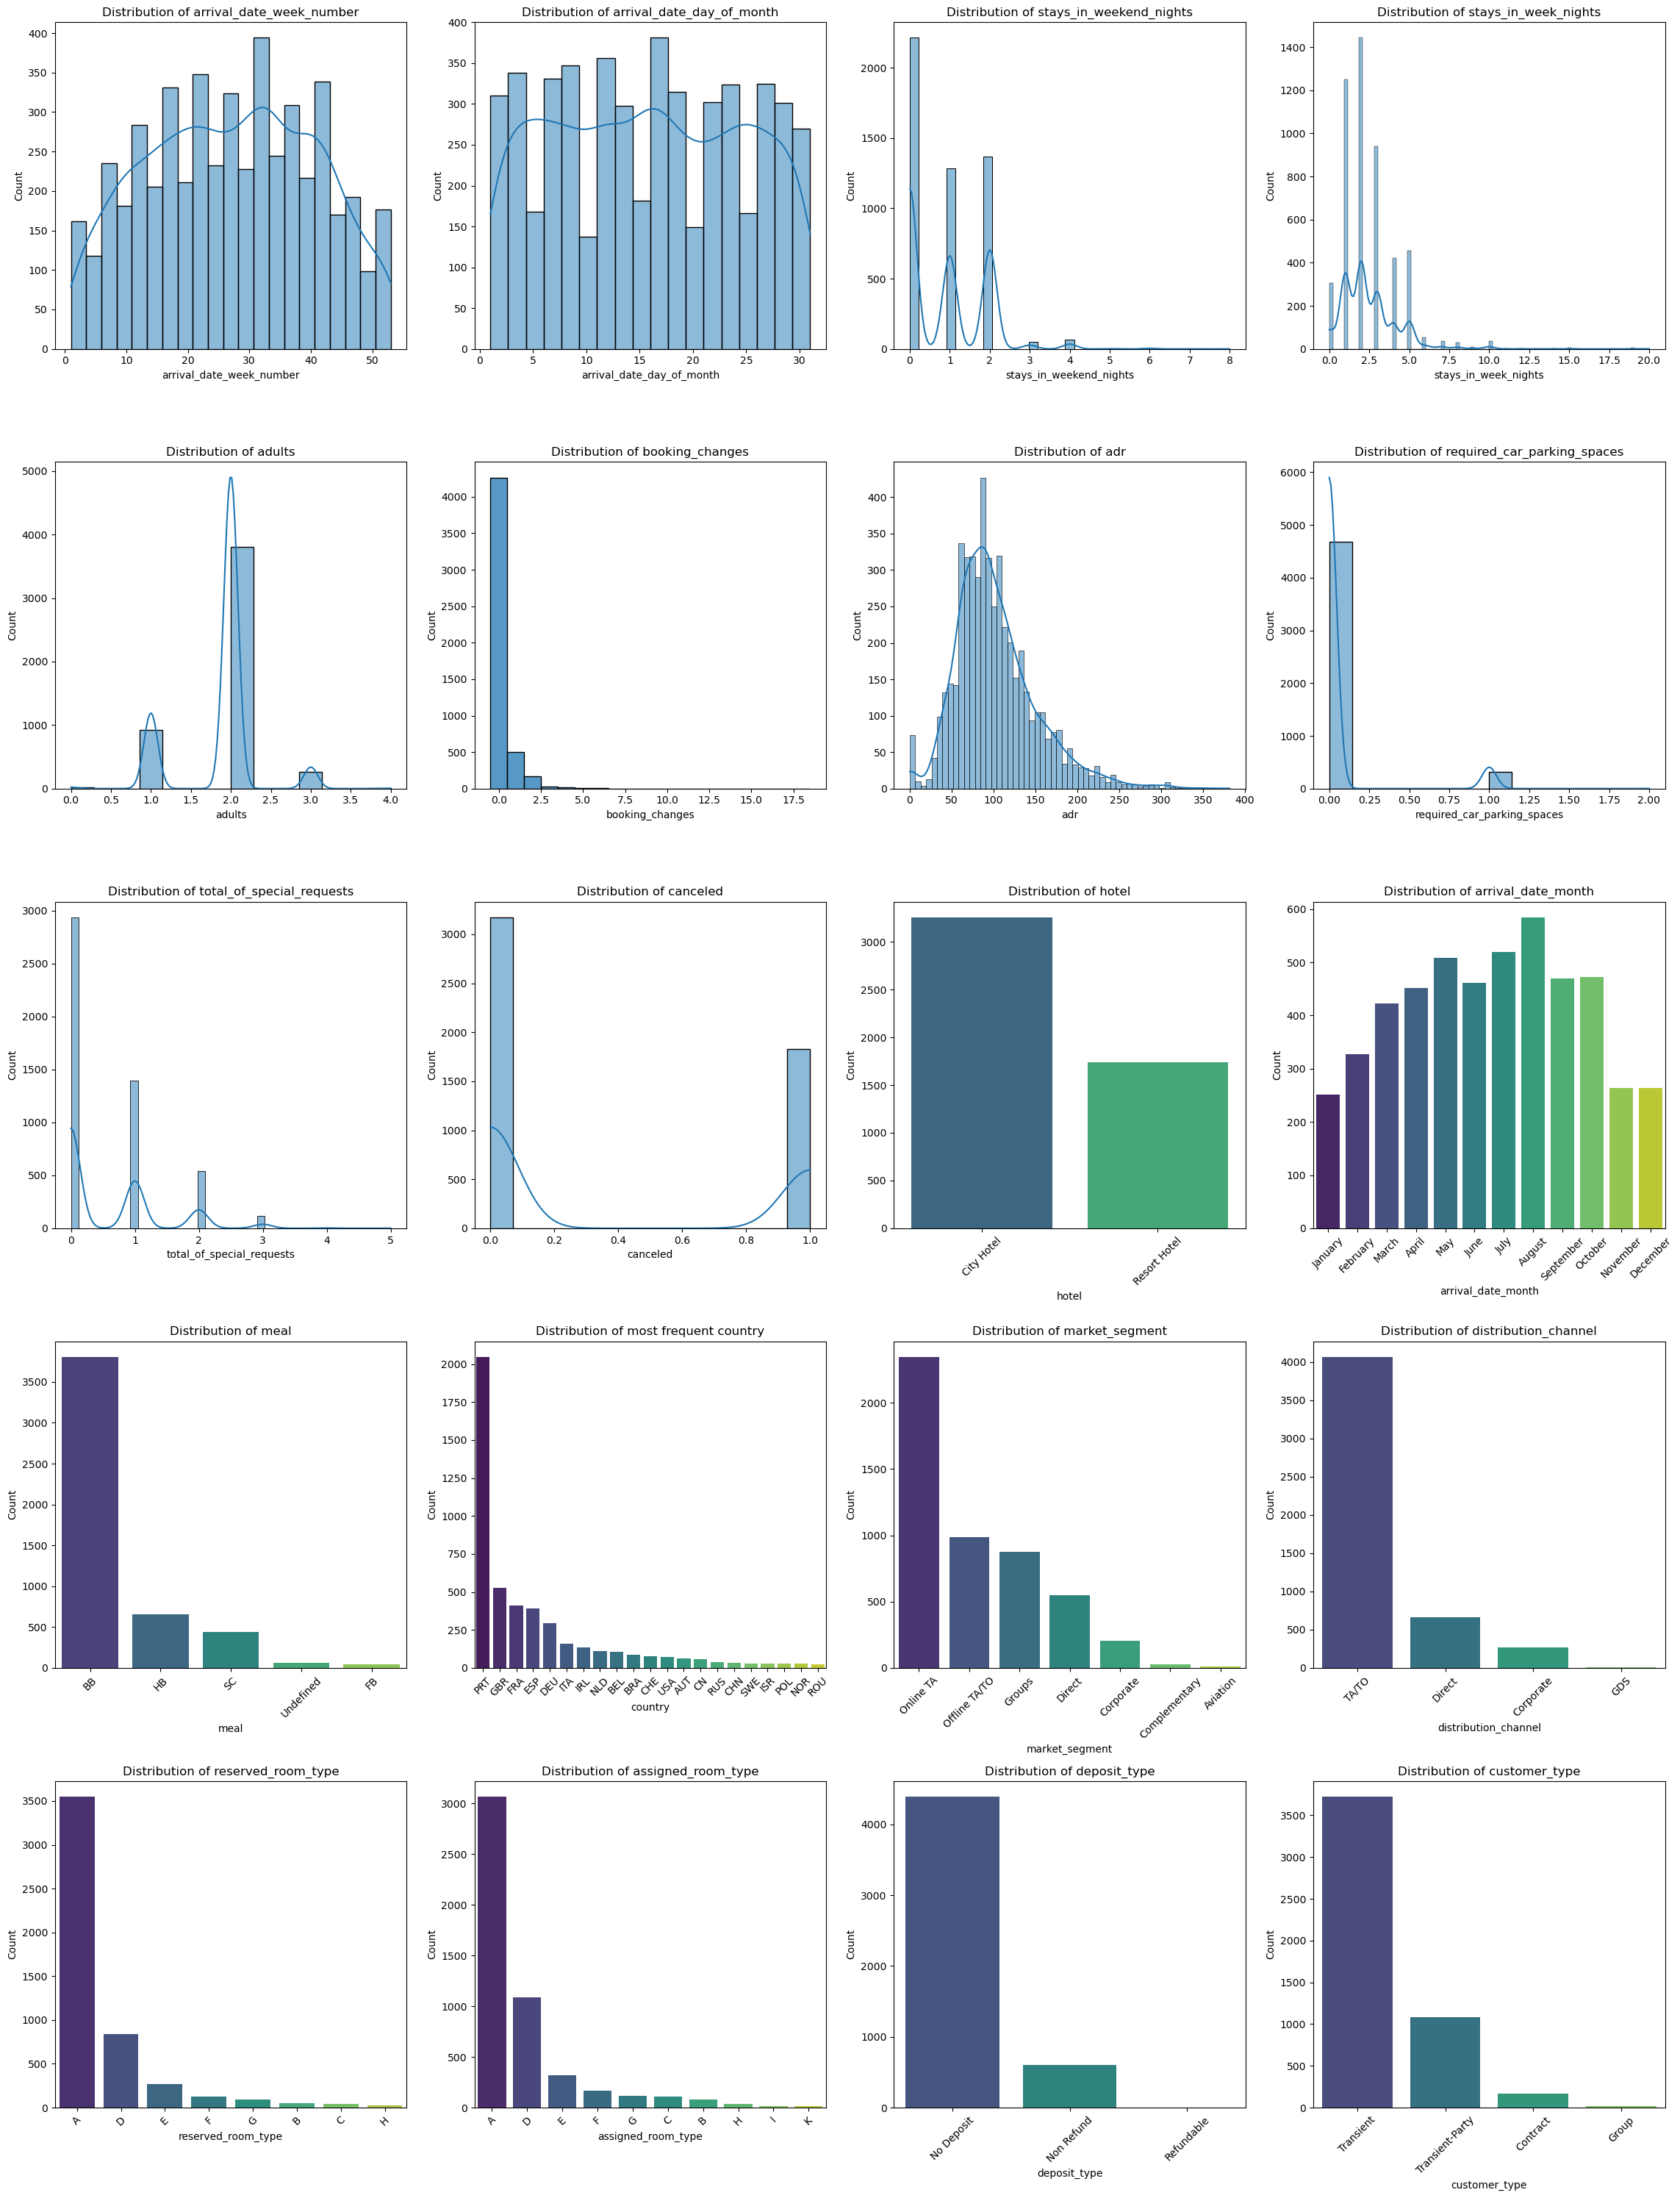

In [7]:
# Sélection des colonnes numériques et catégorielles
numerical_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

# Création d'une figure avec des subplots
n_rows = (len(numerical_columns) + len(categorical_columns) + 1) // 4  # Calculer le nombre de lignes nécessaires
fig, axes = plt.subplots(n_rows, 4, figsize=(23, n_rows * 6))  # Ajuster la taille de la figure

# Traiter les colonnes numériques
for i, col in enumerate(numerical_columns):
    ax = axes[i // 4, i % 4]  # Sélectionner le bon subplot
    if col == 'booking_changes' : 
        unique_values = df['booking_changes'].nunique()
        sns.histplot(df[col], bins=unique_values, discrete=True, kde=False, ax=ax)
    else : 
        sns.histplot(df[col], kde=True, ax=ax)  # Créer un histogramme avec une courbe de densité
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Traiter les colonnes catégorielles
for j, col in enumerate(categorical_columns):
    ax = axes[(len(numerical_columns) + j) // 4, (len(numerical_columns) + j) % 4]  # Sélectionner le bon subplot
    if col == 'arrival_date_month' : #ordonner les mois 
        months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        sns.countplot(data=df, x=col, ax=ax, palette='viridis', order=months_order)
        ax.set_title(f'Distribution of {col}')
    elif col == 'country' : #obligé de filtrer parce que sinon on a 90 valeurs de pays
        country_counts = df['country'].value_counts()
        filtered_countries = country_counts[country_counts > 20].index
        filtered_country = df[df['country'].isin(filtered_countries)]
        sns.countplot(data=df, x=col, ax=ax, palette='viridis', order=filtered_countries)
        ax.set_title(f'Distribution of most frequent {col}')
    else : 
        sns.countplot(data=df, x=col, ax=ax, palette='viridis', order = df[col].value_counts().index)  # Créer un countplot
        ax.set_title(f'Distribution of {col}')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotation des labels si nécessaire


# Ajuster l'espacement
plt.tight_layout()
plt.show()

### Variables interactions

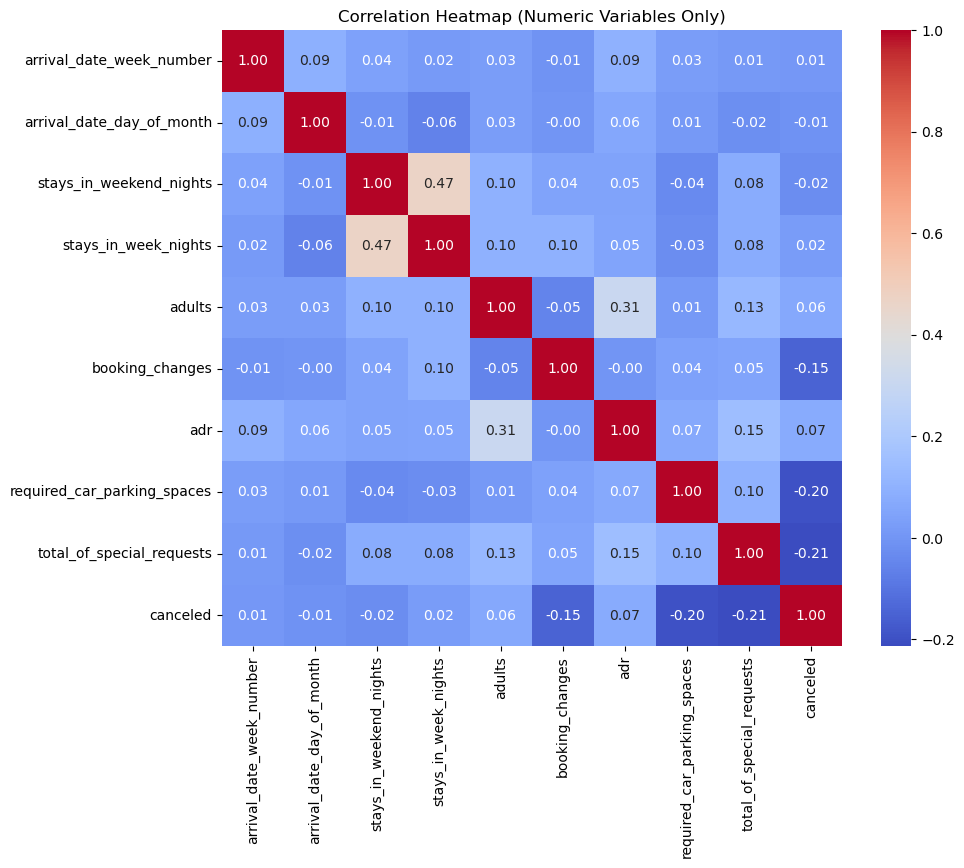

In [8]:
# Sélectionner uniquement les colonnes numériques
numeric_df = df.select_dtypes(include='number')

# Créer la heatmap de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Variables Only)")
plt.show()

c:\Users\vadim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


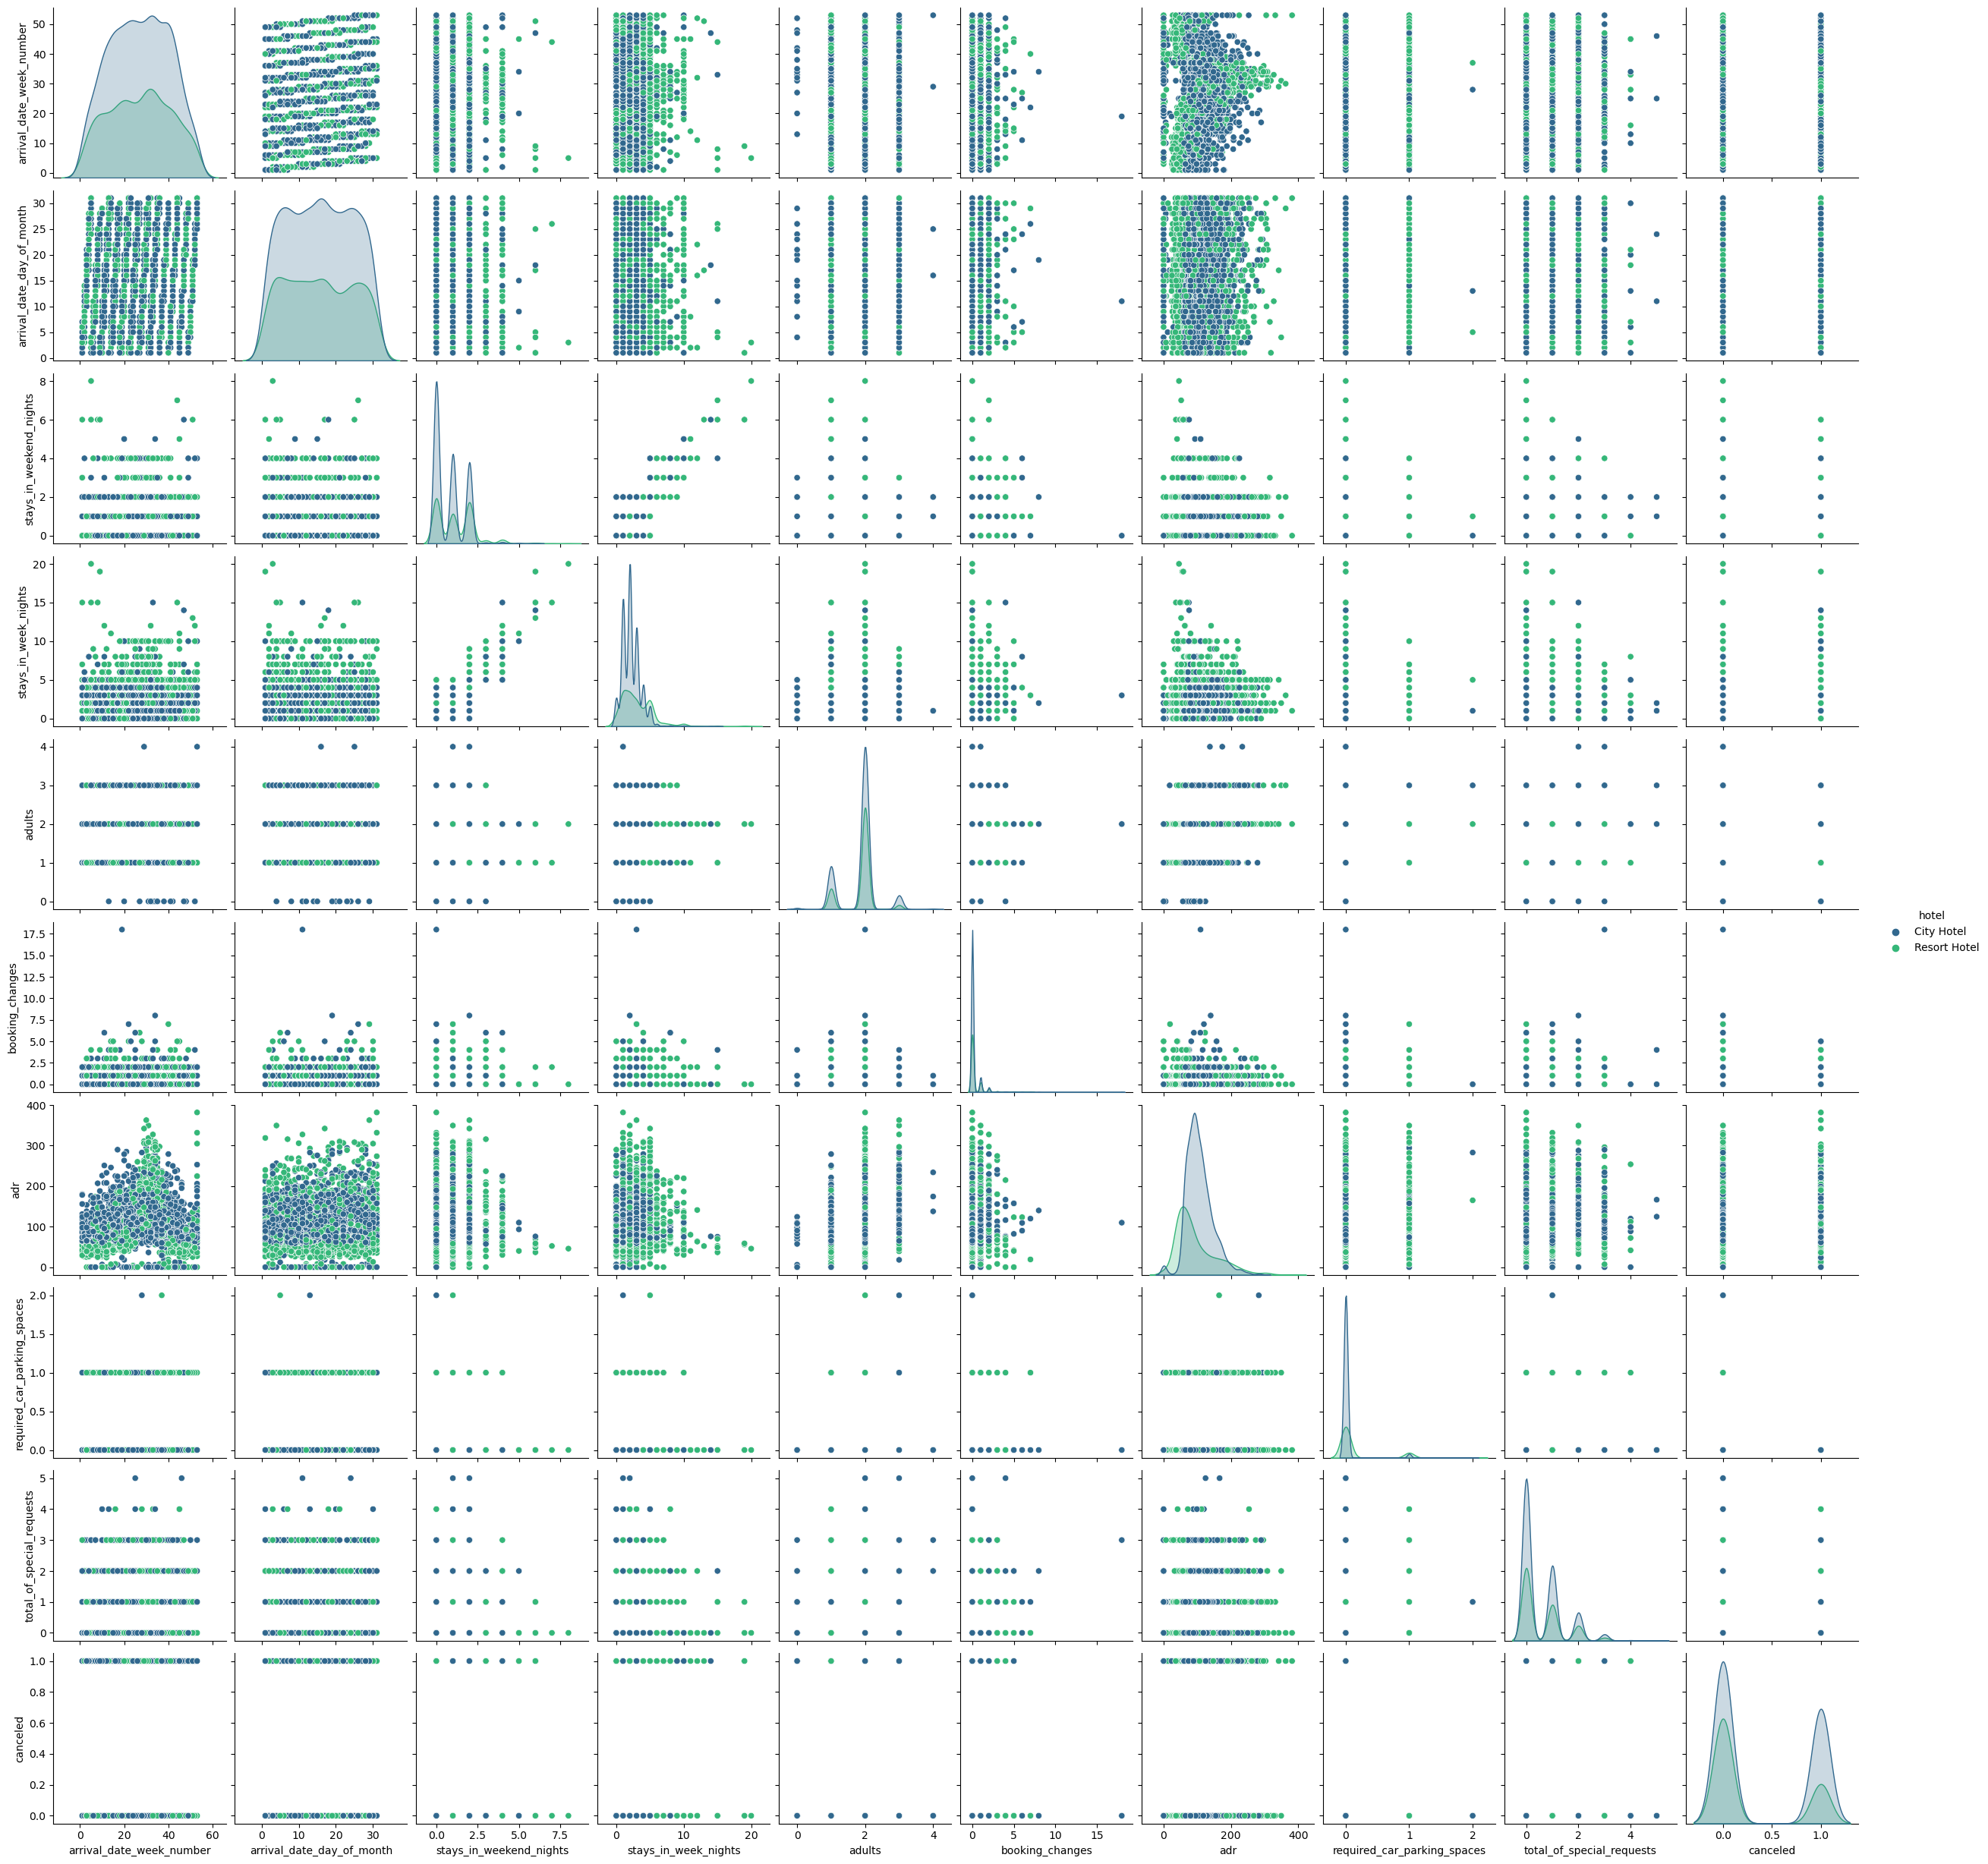

In [9]:
sns.pairplot(df, hue='hotel', palette='viridis')
plt.show()

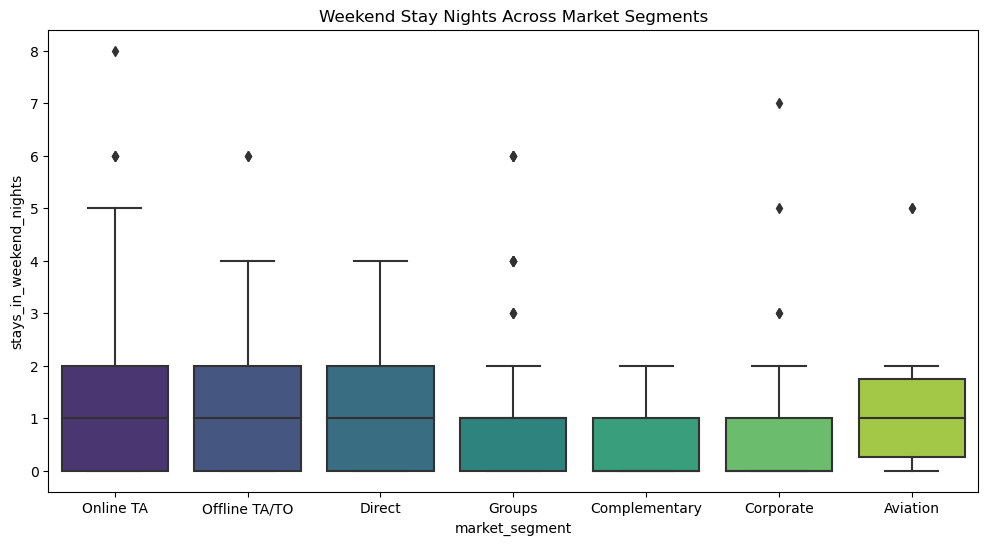

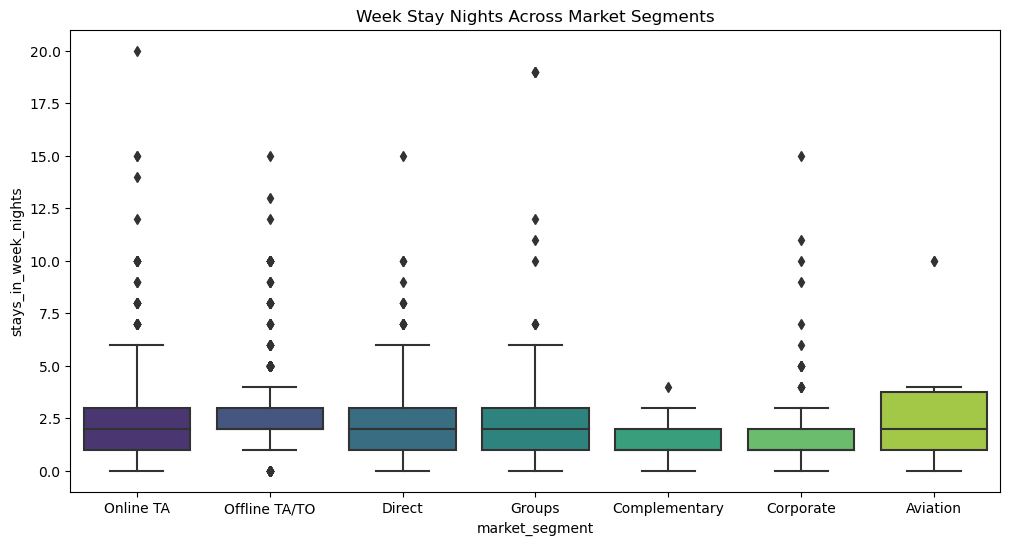

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='market_segment', y='stays_in_weekend_nights', palette='viridis')
plt.title("Weekend Stay Nights Across Market Segments")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='market_segment', y='stays_in_week_nights', palette='viridis')
plt.title("Week Stay Nights Across Market Segments")
plt.show()


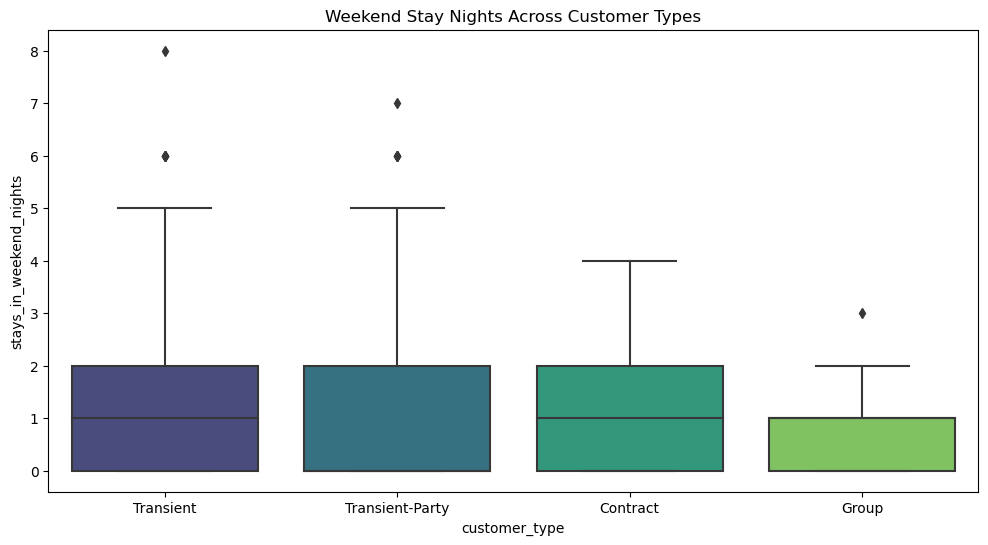

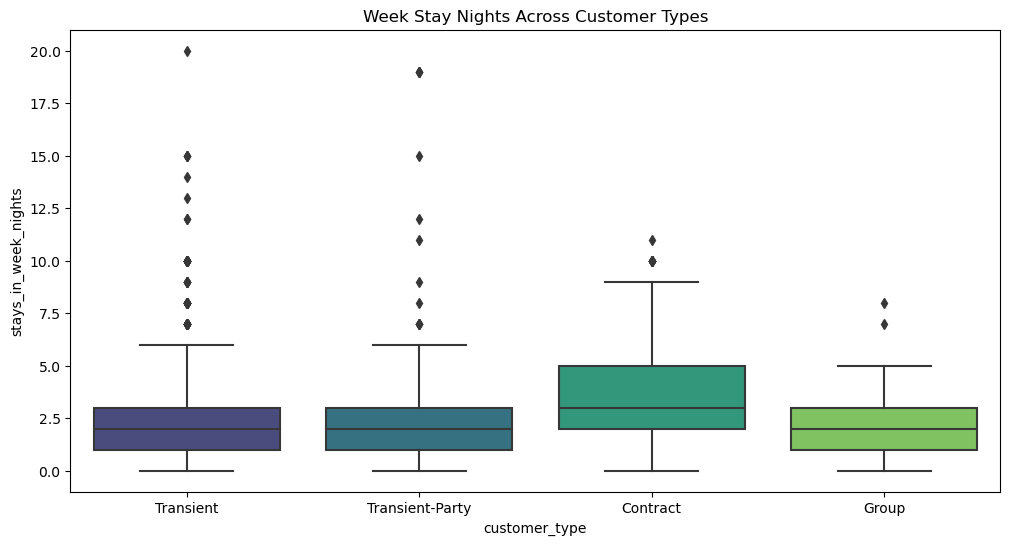

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='customer_type', y='stays_in_weekend_nights', palette='viridis')
plt.title("Weekend Stay Nights Across Customer Types")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='customer_type', y='stays_in_week_nights', palette='viridis')
plt.title("Week Stay Nights Across Customer Types")
plt.show()


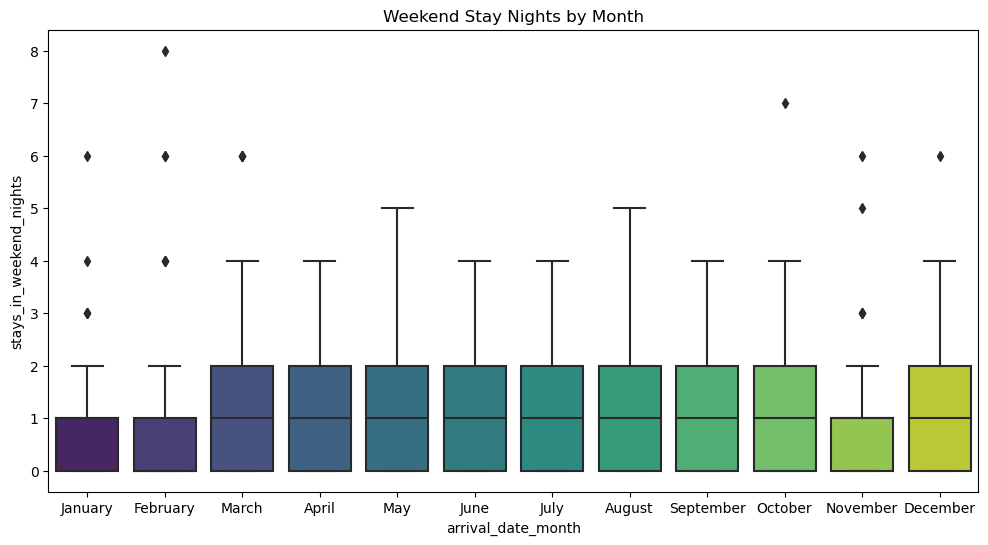

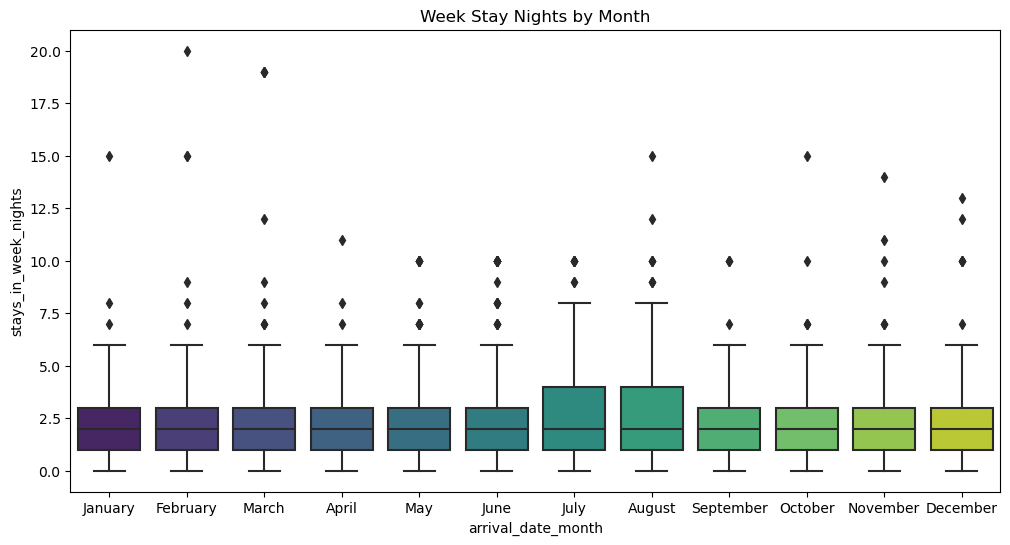

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='arrival_date_month', y='stays_in_weekend_nights', palette='viridis', order=months_order)
plt.title("Weekend Stay Nights by Month")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='arrival_date_month', y='stays_in_week_nights', palette='viridis', order=months_order)
plt.title("Week Stay Nights by Month")
plt.show()


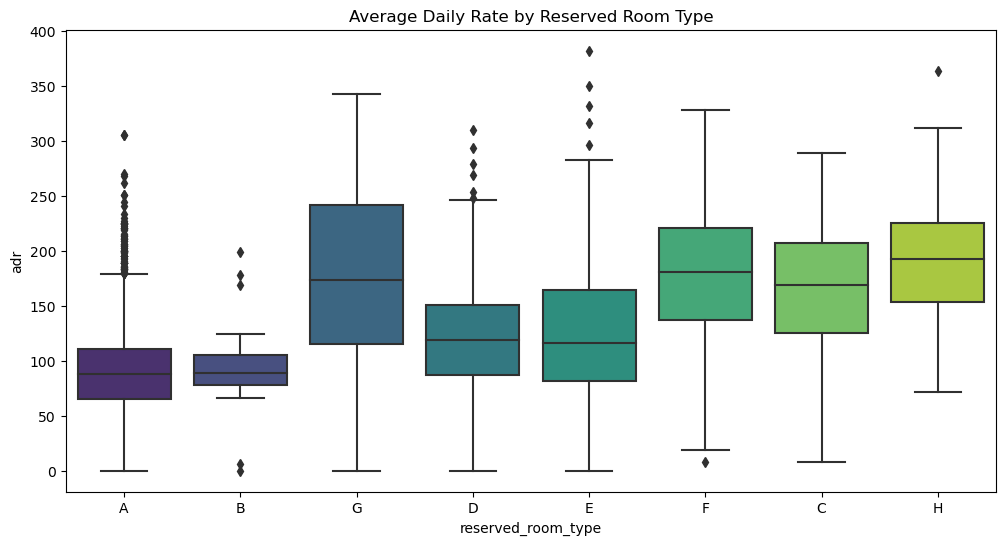

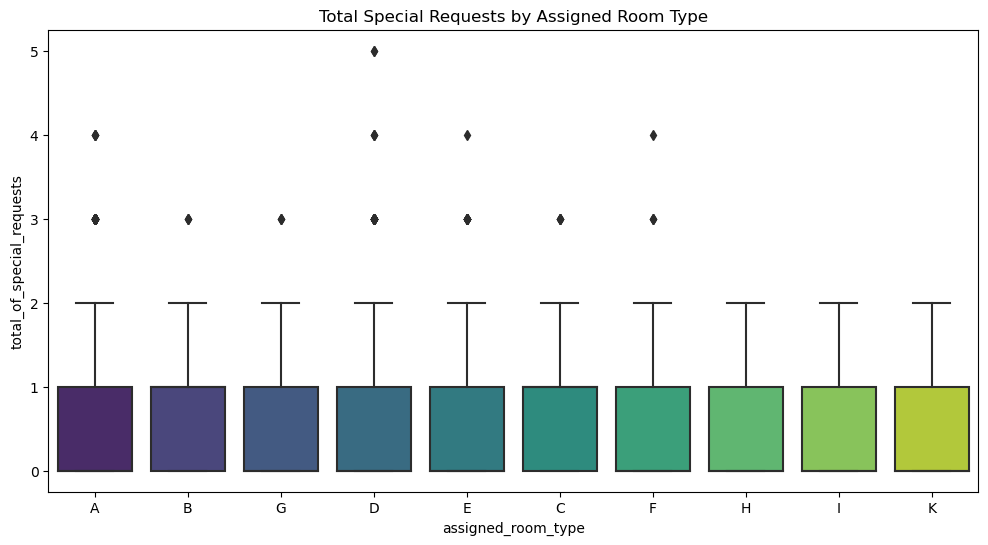

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='reserved_room_type', y='adr', palette='viridis')
plt.title("Average Daily Rate by Reserved Room Type")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='assigned_room_type', y='total_of_special_requests', palette='viridis')
plt.title("Total Special Requests by Assigned Room Type")
plt.show()


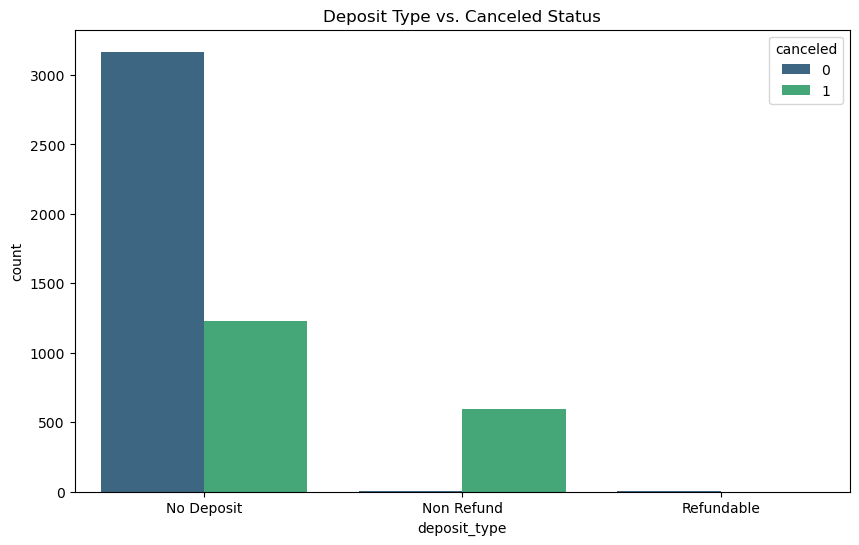

In [11]:

plt.figure(figsize=(10, 6))
sns.countplot(x='deposit_type', hue='canceled', data=df, palette='viridis')
plt.title("Deposit Type vs. Canceled Status")
plt.show()

### Most correlated variable to cancellation

In [ ]:
# Encodage one-hot des variables catégorielles
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first supprime une catégorie par variable pour éviter les redondances

# Vérification du DataFrame encodé
df_encoded.head()


,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,canceled,...,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,9,21,1,0,2,0,91.0,0,1,1,...,False,False,False,False,False,False,False,False,True,False
1,29,17,1,0,2,0,140.0,0,2,1,...,False,False,False,False,False,False,False,False,True,False
2,29,22,1,1,2,0,122.4,0,1,0,...,False,False,False,False,False,False,False,False,False,True
3,11,9,0,3,2,0,77.5,0,2,1,...,False,False,False,False,False,False,False,False,True,False
4,38,11,1,0,2,0,89.0,0,2,0,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# Calculer les corrélations entre toutes les variables encodées et la variable 'canceled'
correlations = df_encoded.corr()['canceled'].sort_values(ascending=False)

# Afficher les corrélations les plus importantes
print(correlations.head(10))  # Variables les plus associées aux annulations
print(correlations.tail(10))  # Variables les moins associées aux annulations


canceled                      1.000000
deposit_type_Non Refund       0.484302
country_PRT                   0.346379
market_segment_Groups         0.193502
distribution_channel_TA/TO    0.187988
customer_type_Transient       0.152129
adr                           0.073442
adults                        0.062954
meal_FB                       0.053118
arrival_date_month_July       0.047757
Name: canceled, dtype: float64
country_FRA                     -0.111628
country_GBR                     -0.114252
assigned_room_type_D            -0.122504
hotel_Resort Hotel              -0.139643
customer_type_Transient-Party   -0.148748
booking_changes                 -0.151065
distribution_channel_Direct     -0.164279
market_segment_Direct           -0.170372
required_car_parking_spaces     -0.198682
total_of_special_requests       -0.213235
Name: canceled, dtype: float64


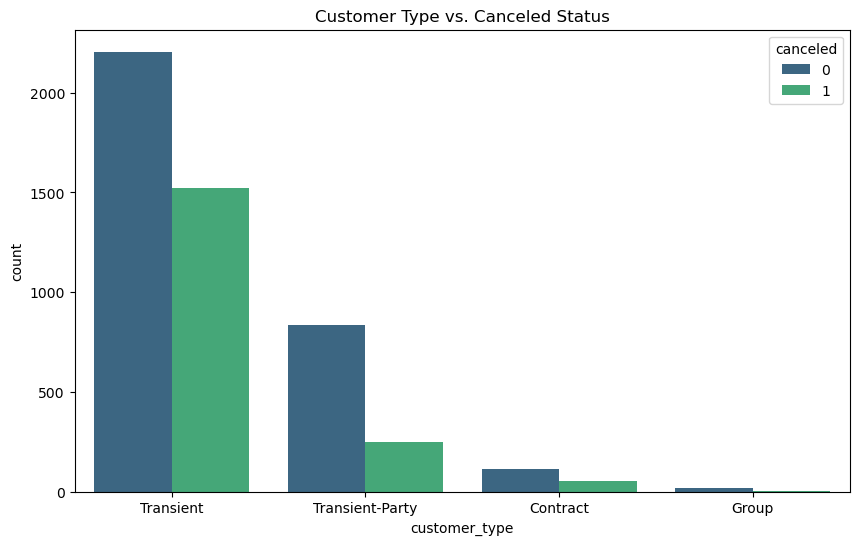

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='customer_type', hue='canceled', data=df, palette='viridis')
plt.title("Customer Type vs. Canceled Status")
plt.show()


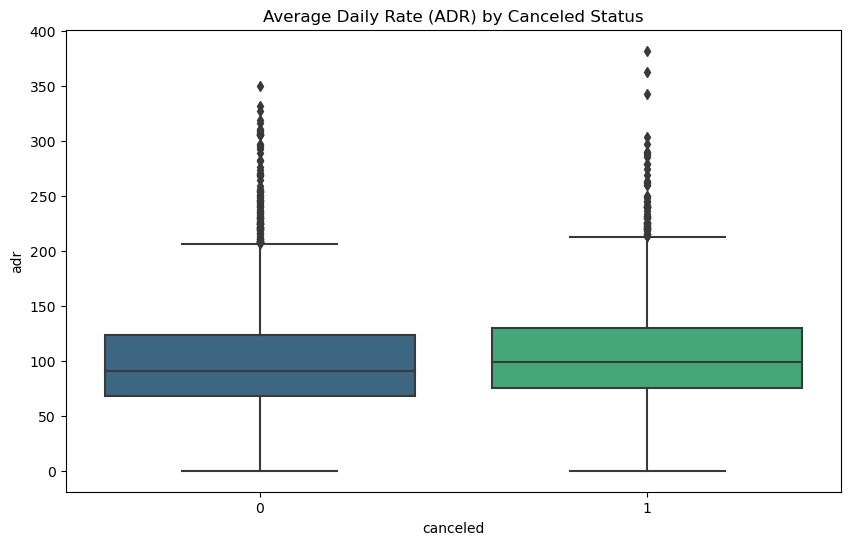

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='canceled', y='adr', data=df, palette='viridis')
plt.title("Average Daily Rate (ADR) by Canceled Status")
plt.show()


### Model prediction

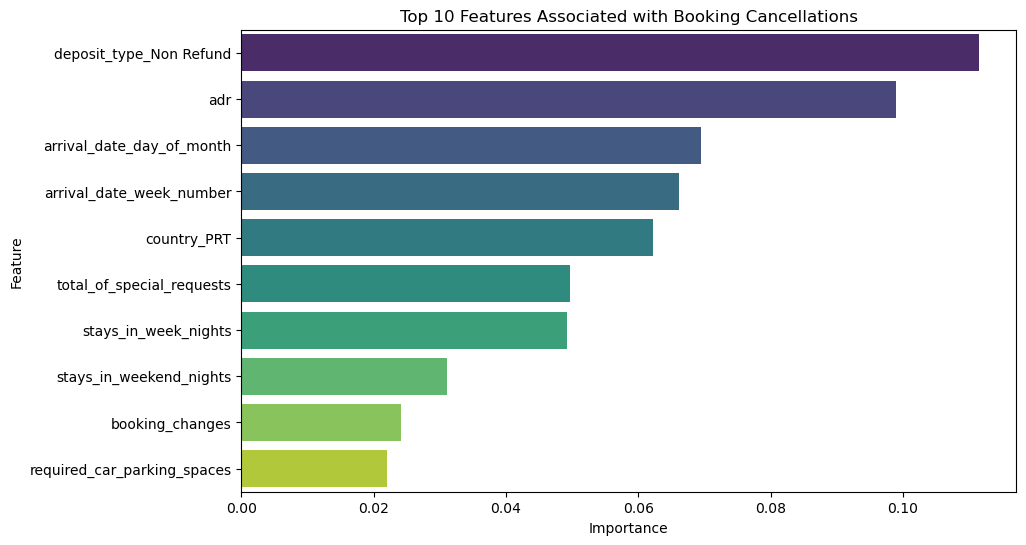

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Préparation des données
X = df_encoded.drop(columns=['canceled'])
y = df_encoded['canceled']

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraînement du modèle
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Importance des variables
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Afficher les 10 variables les plus importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title("Top 10 Features Associated with Booking Cancellations")
plt.show()
